## Data Loader Test

In [7]:
from os import listdir
from os.path import isfile, join
from data_loader import FundusDataLoader
import numpy as np


mypath = '/home/vip/sayan-mandal/datasets/obj_criteria/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [2]:
csv_path = '/home/vip/sayan-mandal/datasets/obj_criteria/20200619-objective.csv'
img_path = '/home/vip/sayan-mandal/datasets/obj_criteria/good_reduced/'
FD = FundusDataLoader(csv_path, img_path)

In [3]:
img,label = FD[99]
img.show()
print(label)

1


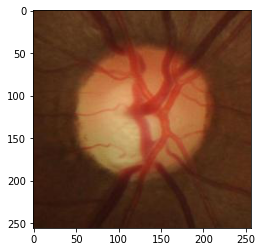

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(img)

In [13]:
for i in range(7000):
    img,l = FD[i]
    print(l)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
1
1
1
1
1
0
0
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
1
1
1
1
1
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
0
0
0
1
1
1
1
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
1
1
1
1
1
1
1
1
0
0
0
0
0
0
1
1
1
1
1
0
0
0
1
0
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
1
1
1
1
1
1
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
0
0
0
0
0
0
1
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0


In [8]:
np.array(img)

array([[[78, 43, 21],
        [78, 43, 21],
        [80, 45, 23],
        ...,
        [99, 58, 30],
        [98, 54, 27],
        [96, 52, 25]],

       [[77, 42, 20],
        [78, 43, 21],
        [79, 44, 22],
        ...,
        [94, 53, 25],
        [92, 48, 21],
        [89, 45, 20]],

       [[77, 42, 20],
        [77, 42, 20],
        [78, 43, 21],
        ...,
        [93, 49, 24],
        [87, 43, 18],
        [84, 39, 16]],

       ...,

       [[46, 24, 11],
        [46, 24, 11],
        [47, 25, 12],
        ...,
        [76, 45, 24],
        [75, 44, 23],
        [74, 43, 22]],

       [[47, 25, 12],
        [47, 25, 12],
        [48, 26, 13],
        ...,
        [75, 44, 23],
        [73, 42, 21],
        [71, 40, 19]],

       [[47, 25, 12],
        [48, 26, 13],
        [48, 26, 13],
        ...,
        [75, 44, 23],
        [72, 41, 20],
        [69, 38, 17]]], dtype=uint8)

### Data Analysis

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/home/vip/sayan-mandal/datasets/obj_criteria/20200619-objective.csv', low_memory = False)

df_subjective = pd.read_csv('/home/vip/sayan-mandal/datasets/obj_criteria/20200623-images_with_subjective.csv')
df_subjective = df_subjective[['maskedid']].drop_duplicates().reset_index(drop = True)
df_subjective['with_subjective'] = 1

df = df.join(df_subjective.set_index('maskedid'), on = 'maskedid')
df = df.loc[df.with_subjective.isnull() == True].reset_index(drop = True)
df = df.loc[df.classification2 != 'suspect']


In [3]:
df.columns

Index(['file_jpg', 'maskedid', 'eye', 'date', 'imageid', 'octdate', 'dob',
       'age', 'quality', 'rnflmean_g',
       ...
       'series', 'phototype', 'photodate', 'phototime', 'camera',
       'homonymous_nidek', 'dcm_filename', 'studytime', 'seriestime',
       'with_subjective'],
      dtype='object', length=108)

In [7]:
df.iloc[0]["file_jpg"]

'NY7624_2010_07_23_OS_02.JPG'

In [4]:
df.classification2.value_counts()

glaucoma    4657
normal      3970
Name: classification2, dtype: int64

In [8]:
import torch.nn as nn
import torch
from torch.autograd import Variable

In [4]:
lol = torch.Tensor([[1,-1],[-1,1]])

In [40]:
Variable(lol.data.new(lol.size())).normal_().sum()

tensor(2.8768)

In [23]:
lol.data.new(lol.size())

tensor([[4.7994e-36, 0.0000e+00],
        [4.4941e-36, 0.0000e+00]])

In [35]:
Variable(torch.randn(*lol.size())).sum()

tensor(2.3365)